In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import uq4pk_src

from matplotlib.colors import LogNorm

In [2]:
m54_data = uq4pk_src.data.M54()

In [3]:
def orient_image(f):
    image = np.flipud(f.T)
    return image

In [4]:
ssps = uq4pk_src.model_grids.MilesSSP(
    miles_mod_directory='EMILES_BASTI_BASE_BI_FITS',
    imf_string='Ebi1.30',
    lmd_min=None,
    lmd_max=None,
    )

In [5]:
ppxf_sol_shifted = m54_data.ppxf_map_solution + 1e-8

[Text(0, 0.08974358974358979, '-2'),
 Text(0, 0.3638888888888889, '-1'),
 Text(0, 0.7062499999999999, '0')]

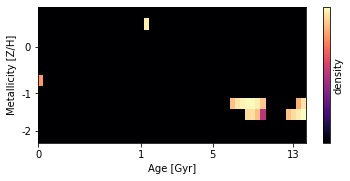

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2.5))

# plot with extent [0,1] in x- and y- dimension
# this is needed for correct axis tick labels
img = ax.imshow(
    orient_image(ppxf_sol_shifted),
    extent=(0,1,0,1),
    aspect='auto',
    cmap=plt.cm.magma,
    norm=LogNorm()
)

# set colorbar
cbar = plt.colorbar(img)
cbar.set_ticks([])
cbar.set_label('density')

# label axes
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Metallicity [Z/H]')

# set x-axis tick labels
ax.set_xticks(ssps.img_t_ticks)
ax.set_xticklabels(ssps.t_ticks)

# set y-axis tick labels
ax.set_yticks(ssps.img_z_ticks)
ax.set_yticklabels(ssps.z_ticks)

But this is mass. Let's convert to density.

First get and orient the volume elements,

In [7]:
dvol = ssps.delta_t[:,np.newaxis] * ssps.delta_z[np.newaxis,:]

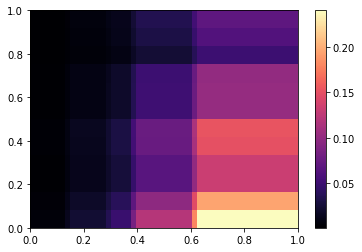

In [8]:
plt.imshow(
    orient_image(dvol),
    extent=(0,1,0,1),
    aspect='auto',
    cmap=plt.cm.magma
)
plt.colorbar()

Then divide mass by vol. element to get density,

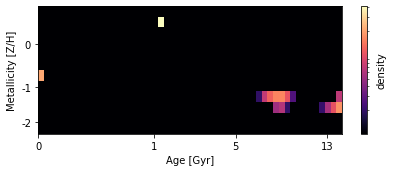

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2.5))

img = ax.imshow(
    orient_image(ppxf_sol_shifted/dvol),
    extent=(0,1,0,1),
    aspect='auto',
    cmap=plt.cm.magma,
    norm=LogNorm(vmin=1e-1)
)

# set colorbar
cbar = plt.colorbar(img)
cbar.set_ticks([])
cbar.set_label('density')

# label axes
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Metallicity [Z/H]')

# set x-axis tick labels
ax.set_xticks(ssps.img_t_ticks)
ax.set_xticklabels(ssps.t_ticks)

# set y-axis tick labels
ax.set_yticks(ssps.img_z_ticks)
ax.set_yticklabels(ssps.z_ticks)

fig.tight_layout()

fig.savefig('paper_plots/boeker_ppxf_reconstruction.png', dpi=300)